# Homework 7: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [1]:
suppressMessages(library(tidyverse))

setwd("~/Documents/Elie_DSPN_S22")
items <-read.csv("Items.csv")
lexicaldata <-read.csv("LexicalData_withIncorrect.csv")

#counted n() before drop_na is 74869

lexicaldata <- left_join(lexicaldata,
                        items %>% select(Word, Length, Log_Freq_HAL),
                        by=c("D_Word"="Word")) %>% drop_na

head(lexicaldata)
# n () is 70589

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

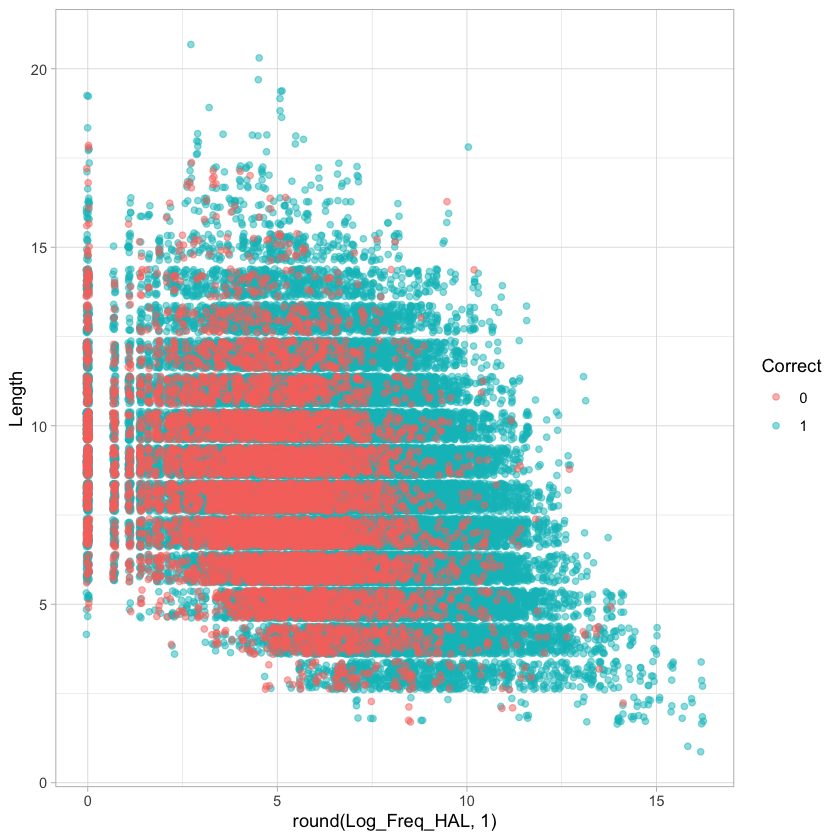

In [2]:
lexicaldata$Correct <- as.factor(lexicaldata$Correct) # so that R knows that Correct is categorical, not numeric. 

# plot the Correct / Incorrect clusters
ggplot(lexicaldata,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + 
        geom_point(position="jitter",alpha=0.5) + 
        theme_light() 


What do you observe about the "Correct" and "Incorrect" clusters? 

> Cluster of incorrect responses clustered within correct responses cluster
> <br> Incorrect responses are less in frequency than Correct responses as length of word increases 
> <br> Cluster of incorrect responses bias towards low frequency HAL, but relatively even distrubtion in terms of length. Cluster of correct responses bias towards short word length. 

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [3]:
m1 <- glm(Correct ~ Length + Log_Freq_HAL + Length*Log_Freq_HAL, data=lexicaldata, family=binomial())
print(summary(m1))


Call:
glm(formula = Correct ~ Length + Log_Freq_HAL + Length * Log_Freq_HAL, 
    family = binomial(), data = lexicaldata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5



In [4]:
#Call:
#glm(formula = Correct ~ Length + Log_Freq_HAL + Length * Log_Freq_HAL, 
    #family = binomial(), data = lexicaldata)

#Deviance Residuals: 
   # Min       1Q   Median       3Q      Max  
#-3.0494   0.3178   0.4182   0.5208   1.3225  

#Coefficients:
                    # Estimate Std. Error z value Pr(>|z|)    
#(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
#Length               0.151266   0.012789  11.828  < 2e-16 ***
#Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
#Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
#---
#Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#(Dispersion parameter for binomial family taken to be 1)

#    Null deviance: 49809  on 70588  degrees of freedom
#Residual deviance: 46563  on 70585  degrees of freedom
#AIC: 46571

#Number of Fisher Scoring iterations: 5

What can you conclude from this output? (a brief gist is fine)

> This model is trying to predict whether a decision will be correct or incorrect given the length, frequency of the word, and combination of both length and frequency of the word. 
> + World length, frequency of the word, and interaction between length and frequency significantly predict whether a subject will a make a correct or incorrect decison. 
> + With an increase in Length, the log odds of deciding *correctly* increases
> + With an increase in Frequency of HAl, the log odds of deciding *correctly* increases 
> + There is a significant interaction between Length and Frequency of HAL on predicting whether an answer will be correct or incorrect, but to know this direction would require further probing to tease it apart.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [5]:
glm_ld_df <- data.frame(predict(m1, type = "response"))
colnames(glm_ld_df) = c('predicted_correct')

num_obs = nrow(glm_ld_df)
glm_ld_df$index = seq(1, num_obs)

threshold = 0.5

glm_ld_df$predicted_binary=rep("0",num_obs) #list of 'incorrect'
glm_ld_df$predicted_binary[glm_ld_df$predicted_correct>threshold]="1" #find the rows that have prob > threshold and cast as 'correct'

matrix_df <- data.frame(glm_ld_df$predicted_binary, lexicaldata$Correct)
colnames(matrix_df) = c('predicted', 'actual')

table(matrix_df)

#(13+62566)/(13+44+7966+62566)

print(paste("Accuracy:",mean(matrix_df$predicted == matrix_df$actual)))

         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


In [9]:
#         actual
#predicted     0     1
#        0    13    44
#        1  7966 62566
#[1] "Accuracy: 0.886526229299183"

Did the model do well at predicting lexical decision correctness? Why or why not? 

>  Yes, the model did dooes fairly well in predicting lexical decision correctness (89% accuracy). Frequency of correct predictions is greater than frequency of errors. 
>  <br> However, it doesn't not perform as well at correctly predicting incorrect decision. 

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [6]:
suppressMessages(library(MASS))

m1.fit <-qda(Correct ~ Length + Log_Freq_HAL + Length*Log_Freq_HAL, data=lexicaldata)
print(m1.fit)

Call:
qda(Correct ~ Length + Log_Freq_HAL + Length * Log_Freq_HAL, 
    data = lexicaldata)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219


In [7]:
#Call:
#qda(Correct ~ Length + Log_Freq_HAL + Length * Log_Freq_HAL, 
  #  data = lexicaldata)

#Prior probabilities of groups:
#        0         1 
#0.1130346 0.8869654 

#Group means:
#    Length Log_Freq_HAL Length:Log_Freq_HAL
#0 8.047124     4.932123            37.95260
#1 7.979971     6.444849            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [8]:
correct_test = lexicaldata$Correct
qda.class=predict(m1.fit, lexicaldata)$class
table(qda.class, correct_test)
print(paste("Accuracy:",mean(qda.class==correct_test)))

         correct_test
qda.class     0     1
        0   455  1647
        1  7524 60963

[1] "Accuracy: 0.870078907478502"


In [10]:
#  correct_test
#qda.class     0     1
#        0   455  1647
#        1  7524 60963
#[1] "Accuracy: 0.870078907478502"

How does QDA prediction performance differ from that of logistic regression?

> QDA prediction is doing about the same, with a test accuracy of 87% (compared to test accuracy of 89% in the logistic regression).
> 

**DUE:** 5pm EST, March 25, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Danielle F., Avital P.,*